In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

# Read in datasets

## Reviews

In [2]:
reviews_df = pd.read_csv('./reviews.csv')
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\r\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW. Thanks for a great stay."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \r\n\r\nI believe the only ""issue"" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday"
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \r\n\r\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!


In [3]:
reviews_df.shape

(84849, 6)

In [4]:
reviews_df.isna().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

## Calendar

In [5]:
calendar_df = pd.read_csv('./calendar.csv')
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
calendar_df.shape

(1393570, 4)

In [7]:
calendar_df.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [8]:
calendar_df.nunique()

listing_id    3818
date           365
available        2
price          669
dtype: int64

## Listings

In [9]:
listings_df = pd.read_csv('./listings.csv')
listings_df.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no",none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a small landscape business. My life revolves around beauty wherever I find it or create it. I grew up in Seattle and love this city for the people, it's natural beauty and don't know anywhere 

In [10]:
listings_df.shape

(3818, 92)

In [11]:
listings_df.nunique()

id                                  3818
listing_url                         3818
scrape_id                              1
last_scraped                           1
name                                3792
summary                             3478
space                               3119
description                         3742
experiences_offered                    1
neighborhood_overview               2506
notes                               1999
transit                             2574
thumbnail_url                       3498
medium_url                          3498
picture_url                         3818
xl_picture_url                      3498
host_id                             2751
host_url                            2751
host_name                           1466
host_since                          1380
host_location                        120
host_about                          2011
host_response_time                     4
host_response_rate                    45
host_acceptance_

# Summary

In [12]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [13]:
# neighborhoods with the most listings
listings_df.groupby('neighbourhood_cleansed')['id'].count().sort_values(ascending = False)

neighbourhood_cleansed
Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Greenwood                     89
East Queen Anne               82
North Beacon Hill             78
Phinney Ridge                 73
Adams                         70
Mann                          67
Ravenna                       67
West Queen Anne               65
West Woodland                 64
Columbia City                 58
Green Lake                    54
North Queen Anne              54
Leschi                        53
Atlantic                      53
Loyal Heights                 52
Mount Baker                   50
North Admiral                 49
Madrona                       47
Eastlake                      45
Seward Park         

In [14]:
# top 10 neighbourhoods with the most listings
nh_most_listings_top10 = listings_df.groupby('neighbourhood_cleansed')['id'].count().\
                              sort_values(ascending = False).head(10)

In [15]:
nh_most_listings_top10

neighbourhood_cleansed
Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Name: id, dtype: int64

# 1 Distribution of ratings across all listings

In [16]:
#  create dataframe with scores
ratings_df = pd.DataFrame(listings_df['review_scores_rating'].value_counts()).reset_index().\
    rename(columns = {'index':'rating', 'review_scores_rating':'review_count'})
# calculate percentage of total ratings with each score
ratings_df['pct_of_total_reviews'] = ((ratings_df['review_count']/ratings_df['review_count'].sum())*100).round(1)
ratings_df['rating'] = ratings_df['rating'].astype(int)
ratings_df.sort_values('rating', ascending = False)

,rating,review_count,pct_of_total_reviews
0,100,781,24.6
7,99,146,4.6
1,98,292,9.2
3,97,266,8.4
2,96,278,8.8
4,95,260,8.2
5,94,198,6.2
6,93,184,5.8
10,92,105,3.3
11,91,97,3.1


Exploring the distribution of scores across different rating categories

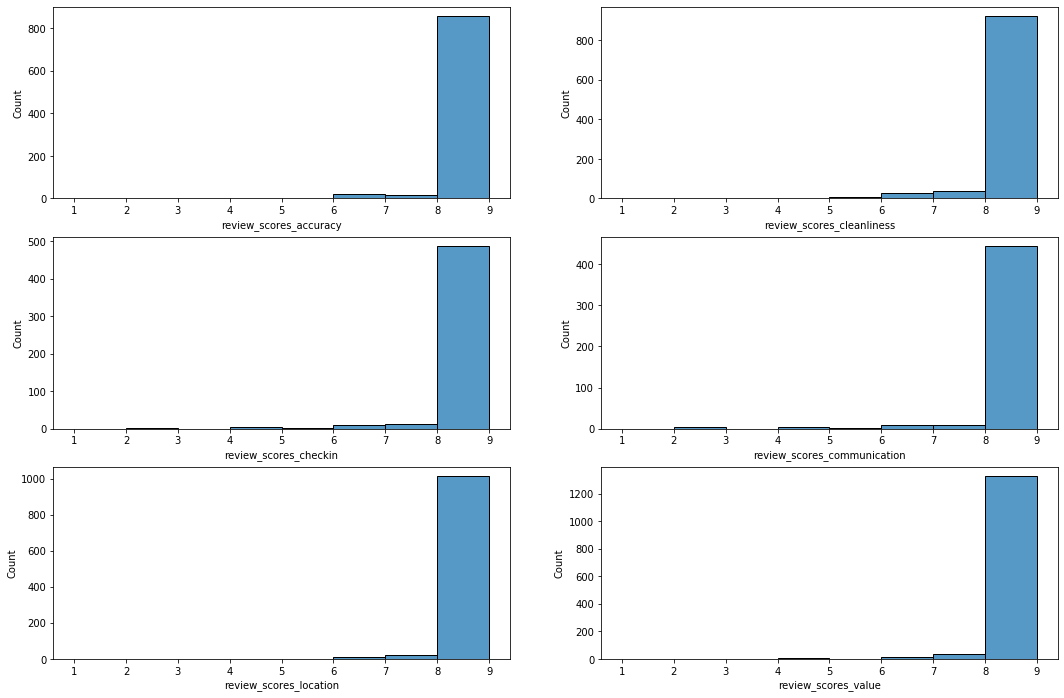

In [17]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 12));
sns.histplot(data = listings_df, x = 'review_scores_accuracy', bins = range(1, 10, 1), ax = ax[0,0])
sns.histplot(data = listings_df, x = 'review_scores_cleanliness', bins = range(1, 10, 1), ax = ax[0,1])
sns.histplot(data = listings_df, x = 'review_scores_checkin', bins = range(1, 10, 1), ax = ax[1,0])
sns.histplot(data = listings_df, x = 'review_scores_communication', bins = range(1, 10, 1), ax = ax[1,1])
sns.histplot(data = listings_df, x = 'review_scores_location', bins = range(1, 10, 1), ax = ax[2,0])
sns.histplot(data = listings_df, x = 'review_scores_value', bins = range(1, 10, 1), ax = ax[2,1]);

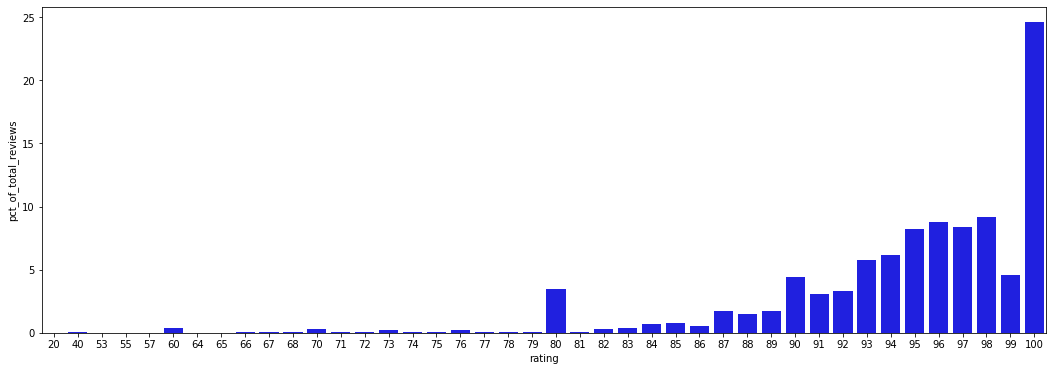

In [18]:
# distibution of review scores ratings over all listings
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6))
sns.barplot(data = ratings_df, x = 'rating', y = 'pct_of_total_reviews', ax = ax, color = 'b');

# 1 Superhost analysis

Split of listings hosted by regular hosts and superhosts

In [19]:
listings_df['host_is_superhost'].value_counts()/listings_df.shape[0]

f    0.795705
t    0.203772
Name: host_is_superhost, dtype: float64

In [20]:
listings_df['host_is_superhost'].value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

## 1.1 Do superhosts receive higher ratings than non superhosts?

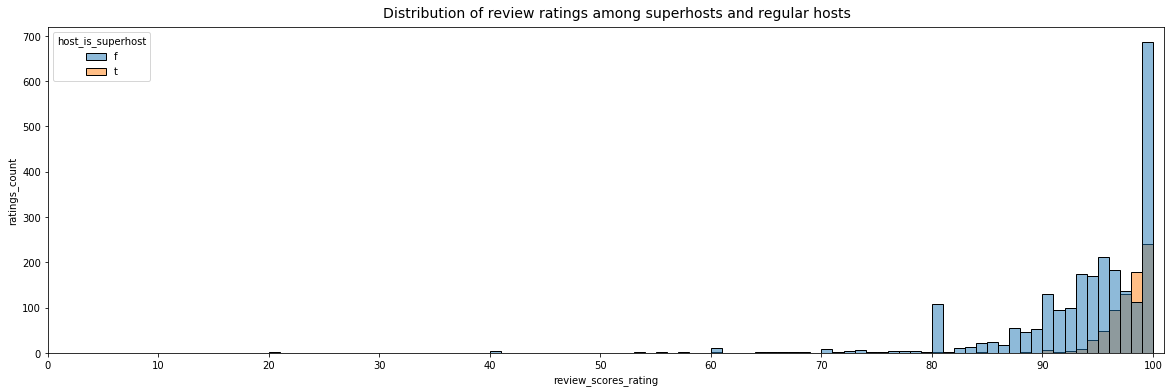

In [21]:
import seaborn as sns
from matplotlib import * 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (20,6))
sns.histplot(data = listings_df, x = 'review_scores_rating', bins = range(0, 101, 1), \
                 ax = ax, hue = 'host_is_superhost');
plt.xlim([0, 101])
plt.xticks(range(0, 101, 10))
plt.title(
    "Distribution of review ratings among superhosts and regular hosts",  # Main title text
    fontsize=14,
    color="black",
    x=0.51,
    y=1.01, 
);
plt.ylabel("ratings_count");

Plot the percentage of reviews that fall within each rating category to get a clearer view

In [22]:
ratings_combined = listings_df.groupby(['host_is_superhost', 'review_scores_rating'], as_index = False)['id'].count()
rating_counts = listings_df.groupby('host_is_superhost')['review_scores_rating'].count()
sh_ratings = ratings_combined[ratings_combined.host_is_superhost == 't'].copy()
sh_ratings['pct_ratings'] = (sh_ratings['id']/rating_counts['t'])*100
rh_ratings = ratings_combined[ratings_combined.host_is_superhost == 'f'].copy()
rh_ratings['pct_ratings'] = (rh_ratings['id']/rating_counts['f'])*100

In [23]:
# percentage of the superhost listing base that have ratings over 90
sh_ratings[sh_ratings.review_scores_rating >= 90]['pct_ratings'].sum()

99.33422103861518

In [24]:
# percentage of the regular host listing base that have ratings over 90
rh_ratings[rh_ratings.review_scores_rating >= 90]['pct_ratings'].sum()

82.60330578512398

In [25]:
# join the super and regular host score datasets
ratings_pct_combined = pd.concat([sh_ratings, rh_ratings])
ratings_pct_combined['review_scores_rating'] = ratings_pct_combined['review_scores_rating'].astype(int)

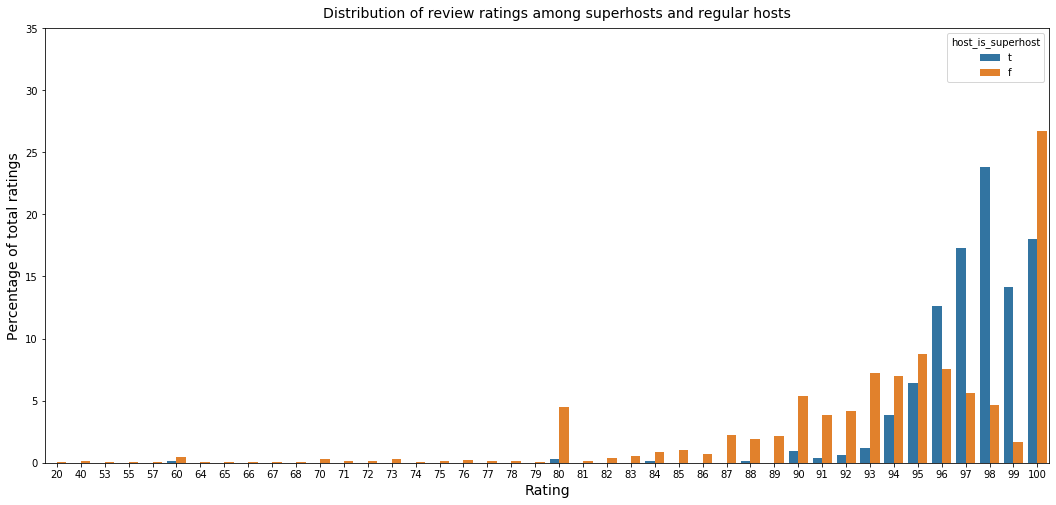

In [26]:
# plot the comparison between superhost and regular host ratings
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 8))
sns.barplot(data = ratings_pct_combined, x = 'review_scores_rating', y = 'pct_ratings', hue = 'host_is_superhost')
plt.title(
    "Distribution of review ratings among superhosts and regular hosts",  # Main title text
    fontsize=14,
    color="black",
    x=0.51,
    y=1.01, 
);
plt.ylabel("Percentage of total ratings", fontsize = 14);
plt.xlabel("Rating", fontsize = 14);
ax.set_yticks(np.arange(0, 40, 5));

## 1.2 Do listings by superhosts cost more on average than non-superhosts?

In [27]:
def plot_compound_bar(pdf, melt_col, var_name, val_name, ax):
    """
    Melts a Pandas dataframe and plots a compound bar graph
    Vars:
    pdf: Pandas dataframe with variables to plot
    melt_col: column to melt the dataframe on
    var_name: name for the variable column in the resultant dataframe
    val_name: name for the value column in the resultant dataframe
    ax: axis to plot on
    """
    melted_df =  pdf.melt(melt_col, var_name = var_name, value_name = val_name )
    sns.barplot(data = melted_df, x = melt_col, y = val_name, hue= var_name, ax = ax)
    plt.xticks(rotation=90);

In [28]:
bookings = pd.merge(calendar_df.rename(columns = {'listing_id':'id'}), \
        listings_df[['id', 'host_is_superhost', 'neighbourhood_cleansed',  'property_type','bedrooms', 'bathrooms' , \
                     'guests_included',\
       'neighbourhood_group_cleansed', 'city']], on='id', how = 'inner').drop_duplicates()

In [29]:
bookings.columns

Index(['id', 'date', 'available', 'price', 'host_is_superhost',
       'neighbourhood_cleansed', 'property_type', 'bedrooms', 'bathrooms',
       'guests_included', 'neighbourhood_group_cleansed', 'city'],
      dtype='object')

In [30]:
bookings['bathrooms'].value_counts()

1.0    1051930
2.0     136145
1.5      90520
2.5      45260
3.0      23360
3.5      20805
0.5      11315
4.0       2920
0.0       2920
4.5       1095
8.0        730
5.0        730
Name: bathrooms, dtype: int64

In [31]:
bookings['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    289810
Capitol Hill           206955
Downtown               193450
Central Area           134685
Queen Anne             107675
Ballard                 83950
West Seattle            74095
Rainier Valley          58035
University District     44530
Beacon Hill             43070
Cascade                 32485
Northgate               29200
Delridge                28835
Lake City               24455
Magnolia                22265
Seward Park             16060
Interbay                 4015
Name: neighbourhood_group_cleansed, dtype: int64

In [32]:
bookings['bedrooms'].value_counts()

1.0    882205
2.0    233600
0.0    135780
3.0    103295
4.0     25185
5.0      8760
6.0      2190
7.0       365
Name: bedrooms, dtype: int64

In [33]:
bookings['property_type'].value_counts()

House              632545
Apartment          623420
Townhouse           43070
Condominium         33215
Loft                14600
Bed & Breakfast     13505
Other                8030
Cabin                7665
Camper/RV            4745
Bungalow             4745
Boat                 2920
Tent                 1825
Treehouse            1095
Dorm                  730
Chalet                730
Yurt                  365
Name: property_type, dtype: int64

In [34]:
# convert the price column to float
bookings['price_clean'] = bookings['price'].fillna(0).str.replace('$','').\
     str.replace(',', '').\
    str.replace(' ', '').astype(float).fillna(0)

In [35]:
bookings['price_clean'].head()

0    85.0
1    85.0
2     0.0
3     0.0
4     0.0
Name: price_clean, dtype: float64

In [36]:
# calculate the average price per unit type
grouped_type_list_prices = bookings.groupby(['host_is_superhost', 'neighbourhood_group_cleansed',\
        'property_type'], as_index=False).\
        agg({'price_clean':'mean', 'id':'nunique'})

In [37]:
# calculate the average price host type
bookings.groupby(['host_is_superhost'], as_index=False).\
        agg({'price_clean':'mean', 'id':'nunique'})

,host_is_superhost,price_clean,id
0,f,91.403067,3038
1,t,97.022076,778


In [38]:
pd.set_option('display.max_rows', 1000)
grouped_type_list_prices.head(20)

,host_is_superhost,neighbourhood_group_cleansed,property_type,price_clean,id
0,f,Ballard,Apartment,66.187606,42
1,f,Ballard,Boat,6.575342,1
2,f,Ballard,Bungalow,31.816438,2
3,f,Ballard,Camper/RV,46.315068,2
4,f,Ballard,Condominium,52.312329,2
5,f,Ballard,House,99.440842,108
6,f,Ballard,Loft,44.257534,1
7,f,Ballard,Townhouse,74.183313,11
8,f,Beacon Hill,Apartment,53.672386,19
9,f,Beacon Hill,Bed & Breakfast,1.463014,1


In [39]:
# average list price for airbnbs hosted by superhosts
superhost_type_list_prices = grouped_type_list_prices[grouped_type_list_prices.host_is_superhost=='t'].\
    rename(columns = {'price_clean':'sh_price', 'id':'sh_listing_count'}).drop(columns = ['host_is_superhost'])
reghost_type_list_prices = grouped_type_list_prices[grouped_type_list_prices.host_is_superhost=='f'].\
    rename(columns = {'price_clean':'rh_price', 'id':'rh_listing_count'}).drop(columns = ['host_is_superhost'])

In [40]:
# join dataframes so that only the common categories are present
joined_host_type_listings = pd.merge(superhost_type_list_prices, reghost_type_list_prices,  \
     how='inner', left_on=['neighbourhood_group_cleansed', 'property_type'], \
                right_on = ['neighbourhood_group_cleansed', 'property_type'])

In [41]:
joined_host_type_listings.columns

Index(['neighbourhood_group_cleansed', 'property_type', 'sh_price',
       'sh_listing_count', 'rh_price', 'rh_listing_count'],
      dtype='object')

In [42]:
joined_host_type_listings.head()

,neighbourhood_group_cleansed,property_type,sh_price,sh_listing_count,rh_price,rh_listing_count
0,Ballard,Apartment,88.873364,18,66.187606,42
1,Ballard,Condominium,37.131507,1,52.312329,2
2,Ballard,House,91.999423,38,99.440842,108
3,Ballard,Loft,48.991781,1,44.257534,1
4,Beacon Hill,Apartment,22.010959,4,53.672386,19


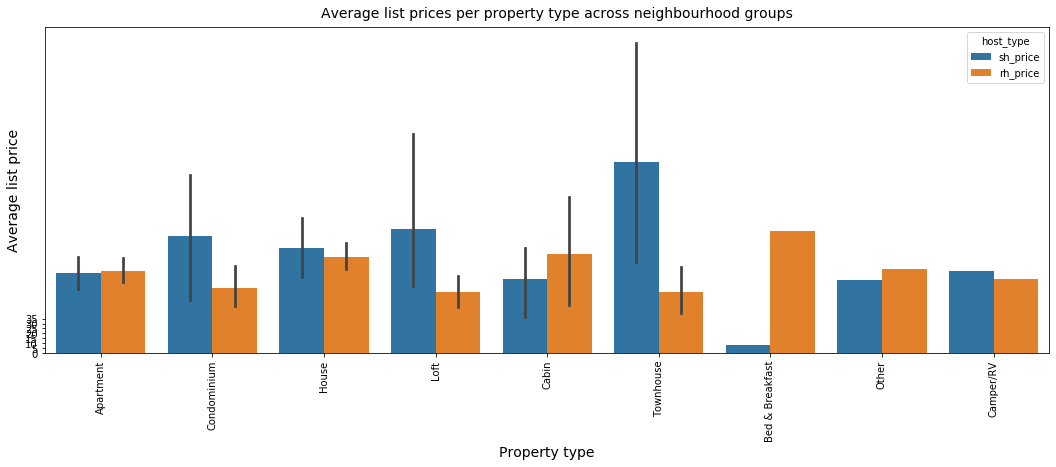

In [43]:
# plot average price over different property types
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6), sharex = True)
plot_compound_bar(joined_host_type_listings[['property_type','sh_price', 'rh_price' ]], 'property_type', 'host_type', 'avg_price', ax)
plt.xticks(rotation=90);
plt.title(
    "Average list prices per property type across neighbourhood groups",
    fontsize=14,
    color="black",
    x=0.51,
    y=1.01, 
);
plt.ylabel("Average list price", fontsize = 14);
plt.xlabel("Property type", fontsize = 14);
ax.set_yticks(np.arange(0, 40, 5));

## Drill down to a specific property type

In [44]:
# calculate the average price per unit type
grouped_list_prices = bookings.groupby(['host_is_superhost', 'neighbourhood_group_cleansed',\
        'bedrooms', 'bathrooms', 'guests_included'], as_index=False).\
        agg({'price_clean':'mean', 'id':'nunique'})

In [45]:
# average list price for airbnbs hosted by superhosts
superhost_list_prices = grouped_list_prices[grouped_list_prices.host_is_superhost=='t'].\
    rename(columns = {'price_clean':'sh_price', 'id':'sh_listing_count'}).drop(columns = ['host_is_superhost'])

In [46]:
# what is the most listed type of unit?
superhost_list_prices.sort_values(['neighbourhood_group_cleansed', 'sh_listing_count'], ascending = [True, False]).head(20)

,neighbourhood_group_cleansed,bedrooms,bathrooms,guests_included,sh_price,sh_listing_count
540,Ballard,1.0,1.0,1,71.856164,20
541,Ballard,1.0,1.0,2,73.658662,17
537,Ballard,0.0,1.0,1,76.465753,2
538,Ballard,0.0,1.0,2,84.301370,2
542,Ballard,1.0,1.0,4,73.375342,2
543,Ballard,1.0,1.5,0,97.808219,2
544,Ballard,1.0,1.5,2,85.691781,2
545,Ballard,2.0,1.0,1,86.452055,2
539,Ballard,1.0,1.0,0,59.863014,1
546,Ballard,2.0,1.0,2,49.915068,1


In [47]:
# average list price for airbnbs not hosted by superhosts
reg_host_list_prices = grouped_list_prices[grouped_list_prices.host_is_superhost=='f'].\
    rename(columns = {'price_clean':'rh_price', 'id':'rh_listing_count'}).drop(columns = ['host_is_superhost'])

In [48]:
reg_host_list_prices.columns

Index(['neighbourhood_group_cleansed', 'bedrooms', 'bathrooms',
       'guests_included', 'rh_price', 'rh_listing_count'],
      dtype='object')

In [49]:
# join dataframes so that only the common categories are present
joined_host_listings = pd.merge(superhost_list_prices, reg_host_list_prices,  \
     how='inner', left_on=['neighbourhood_group_cleansed', 'bedrooms', 'bathrooms', 'guests_included'], \
                right_on = ['neighbourhood_group_cleansed', 'bedrooms', 'bathrooms', 'guests_included'])

In [50]:
# remove rows where either average price is zero
joined_host_listings = joined_host_listings[(joined_host_listings.sh_price > 0) & (joined_host_listings.rh_price > 0)]

In [51]:
joined_host_listings.tail(20)

,neighbourhood_group_cleansed,bedrooms,bathrooms,guests_included,sh_price,sh_listing_count,rh_price,rh_listing_count
135,Rainier Valley,2.0,1.0,1,78.013699,2,154.457534,3
136,Rainier Valley,3.0,1.0,4,25.397260,1,50.523288,1
137,Seward Park,1.0,1.0,1,46.453425,2,44.819406,12
138,Seward Park,1.0,1.0,2,37.151370,4,62.165297,6
139,Seward Park,2.0,1.0,1,73.643836,1,81.373516,3
141,University District,1.0,1.0,1,32.276712,2,57.708985,59
142,University District,1.0,1.0,2,61.008219,3,71.883562,8
144,West Seattle,0.0,1.0,0,22.172603,1,153.493151,1
145,West Seattle,0.0,1.0,1,56.646575,2,38.070320,3
146,West Seattle,0.0,1.0,2,27.095890,4,68.527397,2


In [52]:
joined_host_listings.shape

(153, 8)

In [53]:
# percentage difference between the superhost price and the regular host price
# how much more or less on average is a superhost airbnb listed for compared to a listing by a regular host?
joined_host_listings['percentage_diff'] = ((joined_host_listings.sh_price - joined_host_listings.rh_price)/joined_host_listings.rh_price)*100

In [54]:
pd.options.display.float_format = '{:.0f}'.format

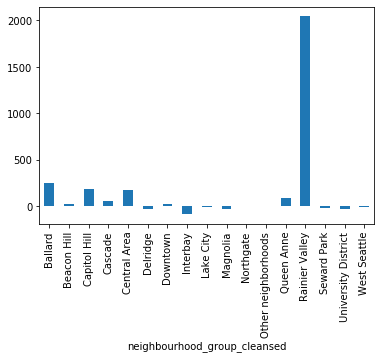

In [55]:
# average differenc in prices of superhost listings and regular host listings
joined_host_listings.groupby('neighbourhood_group_cleansed')['percentage_diff'].mean().plot(kind = 'bar');

In [56]:
# separate the most common unit types - 1 bed and 1 bath with 1 or 2 guests
units_1b1b2g = joined_host_listings[(joined_host_listings.bedrooms == 1) & (joined_host_listings.bathrooms == 1) & (joined_host_listings.guests_included == 2)]
units_1b1b1g = joined_host_listings[(joined_host_listings.bedrooms == 1) & (joined_host_listings.bathrooms == 1) & (joined_host_listings.guests_included == 1)]

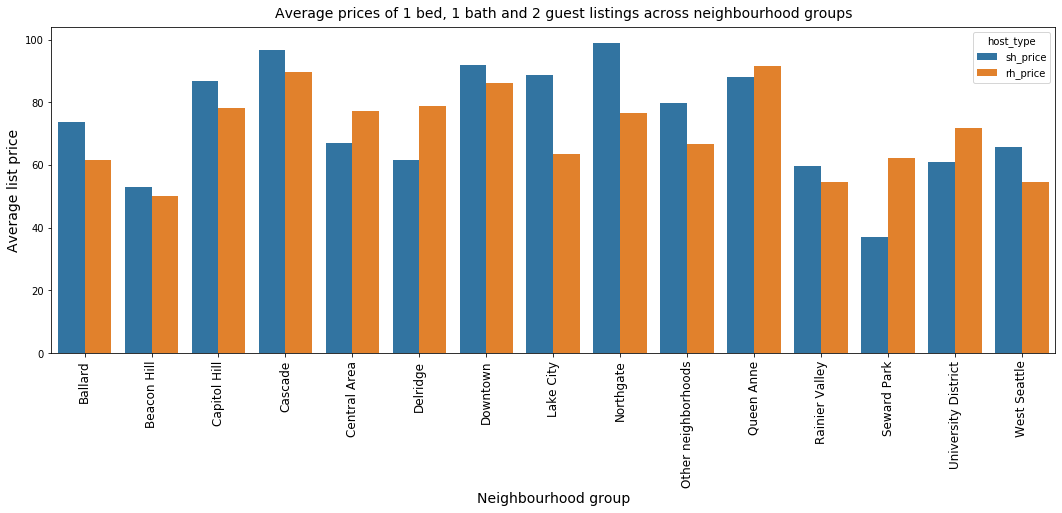

In [57]:
# plot 1 bed, 1 bath, 2 guest unit price comparison
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6), sharex = True, sharey = True)
plt.title(
    "Average prices of 1 bed, 1 bath and 2 guest listings across neighbourhood groups",
    fontsize=14,
    color="black",
    x=0.51,
    y=1.01, 
);
plot_compound_bar(units_1b1b2g[['neighbourhood_group_cleansed','sh_price', 'rh_price' ]], 'neighbourhood_group_cleansed', 'host_type', 'avg_price', ax = ax)
plt.xticks(rotation=90, fontsize = 12);
plt.ylabel("Average list price", fontsize = 14);
plt.xlabel("Neighbourhood group", fontsize = 14);

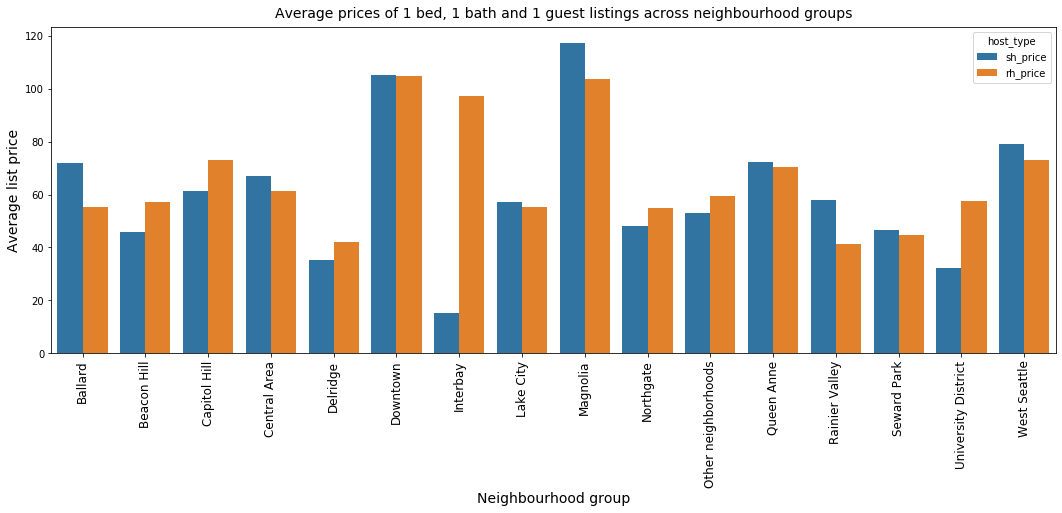

In [58]:
# plot 1 bed, 1 bath and 1 gues unit prices
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 6), sharex = True, sharey = True)
plt.title(
    "Average prices of 1 bed, 1 bath and 1 guest listings across neighbourhood groups",
    fontsize=14,
    color="black",
    x=0.51,
    y=1.01, 
);
plot_compound_bar(units_1b1b1g[['neighbourhood_group_cleansed','sh_price', 'rh_price' ]], 'neighbourhood_group_cleansed', 'host_type', 'avg_price', ax = ax)
plt.xticks(rotation=90, fontsize = 12);
plt.ylabel("Average list price", fontsize = 14);
plt.xlabel("Neighbourhood group", fontsize = 14);

## 1.3 Are airbnbs hosted by superhosts booked more?

In [59]:
# max date in calendar df
calendar_df[['date']].sort_values('date', ascending = False).head(1)

,date
1393569,2017-01-02


In [60]:
# min date in calendar df
calendar_df[['date']].sort_values('date', ascending = False).tail(1)

,date
696785,2016-01-04


In [61]:
bookings['host_is_superhost'].value_counts()

f    1108870
t     283970
Name: host_is_superhost, dtype: int64

In [62]:
bookings['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [63]:
# superhost bookings
sh_bookings = bookings[bookings.host_is_superhost=='t'].groupby(['id', 'available'], as_index = False)['date'].count()

In [64]:
# regular host bookings
rh_bookings = bookings[bookings.host_is_superhost=='f'].groupby(['id', 'available'], as_index = False)['date'].count()

In [65]:
# are there records for each day in the period?
sh_total_bookings = sh_bookings.groupby('id', as_index = False)['date'].sum()
sh_total_bookings['date'].value_counts()

365    778
Name: date, dtype: int64

In [66]:
rh_total_bookings = rh_bookings.groupby('id', as_index = False)['date'].sum()
rh_total_bookings['date'].value_counts()

365    3038
Name: date, dtype: int64

In [67]:
# spot checks
assert calendar_df[(calendar_df.listing_id == 9460) & (calendar_df.available == 't')].shape[0] == 57

In [68]:
# percentage of total period that the unit was booked and not booked
sh_bookings['pct_of_total_time'] = (sh_bookings.date/365)*100
rh_bookings['pct_of_total_time'] = (rh_bookings.date/365)*100

In [69]:
sh_bookings.head()

,id,available,date,pct_of_total_time
0,9460,f,308,84
1,9460,t,57,16
2,9531,f,185,51
3,9531,t,180,49
4,9534,f,103,28


In [70]:
# avg percentage of time listings by superhosts are booked
sh_bookings[sh_bookings.available == 'f']['pct_of_total_time'].mean()

38.20391332791464

In [71]:
# avg percentage of time listings by superhosts are not booked
sh_bookings[sh_bookings.available == 't']['pct_of_total_time'].mean()

67.45550641786213

In [72]:
# avg percentage of time listings by superhosts are booked
rh_bookings[rh_bookings.available == 'f']['pct_of_total_time'].mean()

40.53428576226979

In [73]:
# avg percentage of time listings by superhosts are booked
rh_bookings[rh_bookings.available == 't']['pct_of_total_time'].mean()

69.14924053387162

### using the availability columns

In [74]:
availability = listings_df[['id', 'host_is_superhost', 'neighbourhood_group_cleansed', 'property_type', 'has_availability', 'availability_30',  'availability_60', 'availability_90', 'availability_365']]

In [75]:
availability[availability.host_is_superhost == 'f']['availability_30'].mean()

16.703752468729427

In [76]:
# average availability for superhosts vs non superhosts
availability_agg = availability.groupby('host_is_superhost', as_index = False).agg({
'availability_30': 'mean',
'availability_60': 'mean',
'availability_90': 'mean',
'availability_365': 'mean',
})

In [77]:
availability_agg

,host_is_superhost,availability_30,availability_60,availability_90,availability_365
0,f,17,36,57,246
1,t,17,38,61,241


In [78]:
availability_agg = availability_agg.rename(columns = {
    'availability_30':'30d',
    'availability_60':'60d',
    'availability_90':'90d',
    'availability_365':'365d',
})

In [79]:
availability_agg[availability_agg.host_is_superhost == 'f' ].drop(columns = ['host_is_superhost']).T.reset_index()

,index,0
0,30d,17
1,60d,36
2,90d,57
3,365d,246


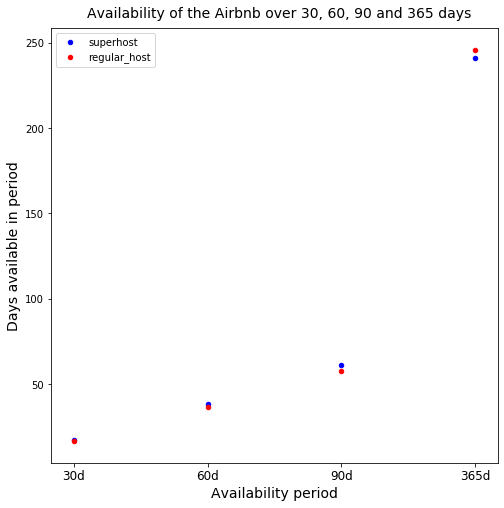

In [80]:
# plot the comparison between availability of superhost and regular host listings 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 8))
availability_agg[availability_agg.host_is_superhost == 't' ].drop(columns = ['host_is_superhost']).T.reset_index().\
    plot(kind = 'scatter', x = 'index', y=1, ax = ax, color = 'blue', label = 'superhost')
availability_agg[availability_agg.host_is_superhost == 'f' ].drop(columns = ['host_is_superhost']).T.reset_index().\
    plot(kind = 'scatter', x = 'index', y=0, ax = ax, color = 'red', label = 'regular_host')
ax.legend()
plt.title(
    "Availability of the Airbnb over 30, 60, 90 and 365 days",
    fontsize=14,
    color="black",
    x=0.51,
    y=1.01, 
);
plt.xticks(fontsize = 12);
plt.ylabel("Days available in period", fontsize = 14);
plt.xlabel("Availability period", fontsize = 14);

### Drilling down to property type and area

In [81]:
availability.groupby(['host_is_superhost', 'property_type'], as_index = False).\
    agg({
'availability_30': 'mean',
'availability_60': 'mean',
'availability_90': 'mean',
'availability_365': 'mean',
})

,host_is_superhost,property_type,availability_30,availability_60,availability_90,availability_365
0,f,Apartment,16,35,56,241
1,f,Bed & Breakfast,23,45,69,267
2,f,Boat,22,48,74,284
3,f,Bungalow,24,48,74,262
4,f,Cabin,12,33,56,256
5,f,Camper/RV,21,44,65,289
6,f,Chalet,15,30,58,333
7,f,Condominium,15,32,50,203
8,f,Dorm,10,25,38,213
9,f,House,17,37,59,253


In [82]:
availability.groupby(['host_is_superhost', 'neighbourhood_group_cleansed'], as_index = False).\
    agg({
'availability_30': 'mean',
'availability_60': 'mean',
'availability_90': 'mean',
'availability_365': 'mean',
})

,host_is_superhost,neighbourhood_group_cleansed,availability_30,availability_60,availability_90,availability_365
0,f,Ballard,15,33,52,246
1,f,Beacon Hill,19,41,64,263
2,f,Capitol Hill,16,35,55,243
3,f,Cascade,13,29,47,202
4,f,Central Area,15,34,54,240
5,f,Delridge,18,41,65,280
6,f,Downtown,17,38,59,242
7,f,Interbay,28,55,85,328
8,f,Lake City,20,42,66,273
9,f,Magnolia,22,45,67,270


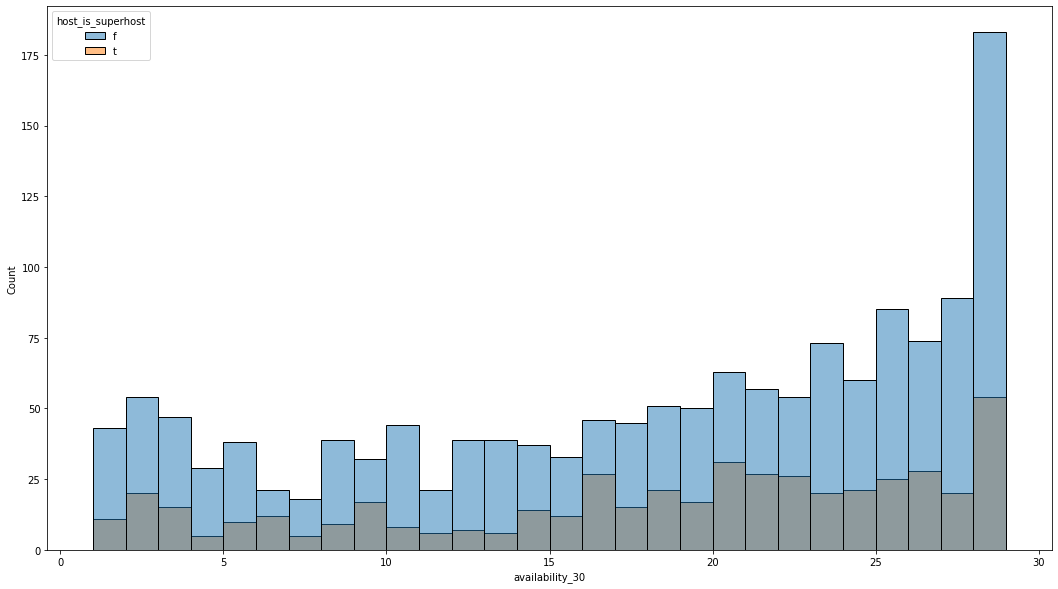

In [83]:
# availability 30d
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (18, 10))
sns.histplot(data = availability, x = 'availability_30', hue = 'host_is_superhost', bins = range(1, 30, 1))

# 2 Amenity Analysis

In [84]:
# extracting information from the amenities column
listings_temp = listings_df[['id', 'amenities',  'host_since', 'host_is_superhost', 
'number_of_reviews',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month' ]]
listings_temp.head()

,id,amenities,host_since,host_is_superhost,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",2011-08-11,f,207,2011-11-01,2016-01-02,95,10,10,10,10,9,10,4
1,953595,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",2013-02-21,t,43,2013-08-19,2015-12-29,96,10,10,10,10,10,10,1
2,3308979,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}",2014-06-12,f,20,2014-07-30,2015-09-03,97,10,10,10,10,10,10,1
3,7421966,"{Internet,""Wireless Internet"",Kitchen,""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",2013-11-06,f,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan
4,278830,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",2011-11-29,f,38,2012-07-10,2015-10-24,92,9,9,10,10,9,9,1


## Separate amenities into separate columns

In [85]:
# remove curly braces and double inverted commas
listings_temp['amenities'] = listings_temp.amenities.replace({'{':'', '}':'', '"':''}, regex=True)

C:\Users\arjunanl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
listings_temp.head()

,id,amenities,host_since,host_is_superhost,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,241032,"TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer",2011-08-11,f,207,2011-11-01,2016-01-02,95,10,10,10,10,9,10,4
1,953595,"TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,Buzzer/Wireless Intercom,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Safety Card,Fire Extinguisher,Essentials",2013-02-21,t,43,2013-08-19,2015-12-29,96,10,10,10,10,10,10,1
2,3308979,"TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Free Parking on Premises,Pets Allowed,Pets live on this property,Dog(s),Cat(s),Hot Tub,Indoor Fireplace,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Essentials,Shampoo",2014-06-12,f,20,2014-07-30,2015-09-03,97,10,10,10,10,10,10,1
3,7421966,"Internet,Wireless Internet,Kitchen,Indoor Fireplace,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Safety Card,Fire Extinguisher,Essentials,Shampoo",2013-11-06,f,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan
4,278830,"TV,Cable TV,Internet,Wireless Internet,Kitchen,Heating,Family/Kid Friendly,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Fire Extinguisher,Essentials,Shampoo",2011-11-29,f,38,2012-07-10,2015-10-24,92,9,9,10,10,9,9,1


In [87]:
# split the amenities column into individual amenities
listings_temp['amenities_list'] = listings_temp['amenities'].apply(lambda x: x.split(','))

C:\Users\arjunanl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
listings_temp[['amenities_list']].head(5)

,amenities_list
0,"[TV, Cable TV, Internet, Wireless Internet, Air Conditioning, Kitchen, Heating, Family/Kid Friendly, Washer, Dryer]"
1,"[TV, Internet, Wireless Internet, Kitchen, Free Parking on Premises, Buzzer/Wireless Intercom, Heating, Family/Kid Friendly, Washer, Dryer, Smoke Detector, Carbon Monoxide Detector, First Aid Kit, Safety Card, Fire Extinguisher, Essentials]"
2,"[TV, Cable TV, Internet, Wireless Internet, Air Conditioning, Kitchen, Free Parking on Premises, Pets Allowed, Pets live on this property, Dog(s), Cat(s), Hot Tub, Indoor Fireplace, Heating, Family/Kid Friendly, Washer, Dryer, Smoke Detector, Carbon Monoxide Detector, Essentials, Shampoo]"
3,"[Internet, Wireless Internet, Kitchen, Indoor Fireplace, Heating, Family/Kid Friendly, Washer, Dryer, Smoke Detector, Carbon Monoxide Detector, Safety Card, Fire Extinguisher, Essentials, Shampoo]"
4,"[TV, Cable TV, Internet, Wireless Internet, Kitchen, Heating, Family/Kid Friendly, Smoke Detector, Carbon Monoxide Detector, First Aid Kit, Fire Extinguisher, Essentials, Shampoo]"


In [89]:
# convert amenities column into a list of lists
am_list = listings_temp['amenities'].to_list()

In [90]:
# get a distinct list of amenities from the list of lists
amenities_distinct = []
for item in am_list:
    temp_list = item.split(',')
    amenities_distinct = amenities_distinct + temp_list
amenities_distinct = sorted(set(amenities_distinct))
amenities_distinct = list(filter(None, amenities_distinct))

In [91]:
amenities_distinct

['24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet']

In [92]:
# determine whether the listing offers any amenities in the list of distinct amenities
amenity_ind_list =[[am in row for row in listings_temp.amenities_list ] for am in amenities_distinct]

In [93]:
amenity_ind_df = pd.DataFrame(amenity_ind_list,index=amenities_distinct).T

In [94]:
amenity_ind_df.head()

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,False,True,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True
1,False,False,False,True,False,True,False,False,False,True,False,True,True,True,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,True,False,True,False,False,True,True,False,False,True
2,False,True,False,False,True,True,True,True,False,True,False,True,True,False,False,True,False,False,False,True,True,True,True,False,True,False,False,False,True,True,False,False,True,True,False,False,True,True,False,False,True
3,False,False,False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,True,False,True,True,False,True,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False,True
4,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,True


In [95]:
# join to original dataframe
listings_temp = pd.concat([listings_temp,amenity_ind_df],axis=1)

In [96]:
listings_temp.shape

(3818, 57)

In [97]:
# count the number of amenities offered per listing
listings_temp['count_amenities'] = listings_temp[['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door',
       'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool',
       'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed',
       'Suitable for Events', 'TV', 'Washer', 'Washer / Dryer',
       'Wheelchair Accessible', 'Wireless Internet']].sum(axis=1)

In [98]:
listings_temp['review_scores_rating'].describe()

count   3171
mean      95
std        7
min       20
25%       93
50%       96
75%       99
max      100
Name: review_scores_rating, dtype: float64

In [99]:
# for highly rated Airbnbs
listings_temp[listings_temp.review_scores_rating >= 99]['count_amenities'].mean()

15.029126213592233

In [100]:
# for lower rated airbnbs
listings_temp[listings_temp.review_scores_rating < 93]['count_amenities'].mean()

13.391644908616188

In [101]:
listings_temp[['id', 'count_amenities', 'review_scores_rating' ]].head()

,id,count_amenities,review_scores_rating
0,241032,10,95
1,953595,16,96
2,3308979,21,97
3,7421966,14,nan
4,278830,13,92


## 2.1 Amenities vs. ratings

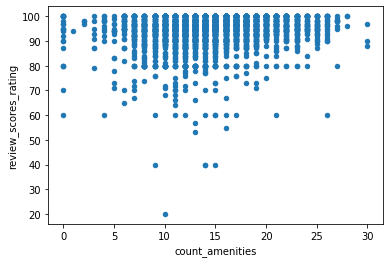

In [102]:
# plot a scatter plot of number of amenities versus ratings
listings_temp[['count_amenities', 'review_scores_rating' ]].plot(kind = 'scatter', x = 'count_amenities', y = 'review_scores_rating')

## 2.1 Analysis of amenity availability

In [103]:
# Amenities in all listings
amenities_all = listings_temp[amenities_distinct].apply(pd.Series.value_counts).T

In [104]:
amenities_all[True]

24-Hour Check-in               616
Air Conditioning               677
Breakfast                      291
Buzzer/Wireless Intercom       538
Cable TV                      1446
Carbon Monoxide Detector      2485
Cat(s)                         382
Dog(s)                         509
Doorman                         85
Dryer                         2997
Elevator in Building           785
Essentials                    3237
Family/Kid Friendly           1963
Fire Extinguisher             2196
First Aid Kit                 1680
Free Parking on Premises      2167
Gym                            442
Hair Dryer                     774
Hangers                        846
Heating                       3627
Hot Tub                        303
Indoor Fireplace               886
Internet                      2811
Iron                           742
Kitchen                       3423
Laptop Friendly Workspace      745
Lock on Bedroom Door           100
Other pet(s)                    51
Pets Allowed        

In [105]:
# calculate percentage of listings that offer each amenity
amenities_all['pct_listings'] = (amenities_all[True] / (amenities_all[True] + amenities_all[False]))*100

In [106]:
amenities_all.head()

,False,True,pct_listings
24-Hour Check-in,3202,616,16
Air Conditioning,3141,677,18
Breakfast,3527,291,8
Buzzer/Wireless Intercom,3280,538,14
Cable TV,2372,1446,38


In [107]:
# Calculate the percentage of superhost listings that offer each amenity 
amenities_sh = listings_temp[listings_temp.host_is_superhost == 't'][amenities_distinct].\
    apply(pd.Series.value_counts).T
amenities_sh['pct_listings'] = (amenities_sh[True] / (amenities_sh[True] + amenities_sh[False]))*100
amenities_sh.head()

,False,True,pct_listings
24-Hour Check-in,620,158,20
Air Conditioning,623,155,20
Breakfast,708,70,9
Buzzer/Wireless Intercom,668,110,14
Cable TV,500,278,36


In [108]:
# Calculate the percentage of highly rated listings that offer each amenity 
amenities_hr = listings_temp[listings_temp.review_scores_rating >= 99][amenities_distinct].apply(pd.Series.value_counts).T
amenities_hr['pct_listings'] = (amenities_hr[True] / (amenities_hr[True] + amenities_hr[False]))*100
amenities_hr.head()

,False,True,pct_listings
24-Hour Check-in,779,148,16
Air Conditioning,756,171,18
Breakfast,858,69,7
Buzzer/Wireless Intercom,789,138,15
Cable TV,546,381,41


In [109]:
# Calculate the percentage of low rated listings that offer each amenity 
amenities_lr = listings_temp[listings_temp.review_scores_rating <=93 ][amenities_distinct].apply(pd.Series.value_counts).T
amenities_lr['pct_listings'] = (amenities_lr[True] / (amenities_lr[True] + amenities_lr[False]))*100
amenities_lr.head()

,False,True,pct_listings
24-Hour Check-in,843,107,11
Air Conditioning,813,137,14
Breakfast,889,61,6
Buzzer/Wireless Intercom,804,146,15
Cable TV,610,340,36


In [110]:
# combine
amenities_all['pct_sh'] =amenities_sh['pct_listings']
amenities_all['pct_hr'] =amenities_hr['pct_listings']
amenities_all['pct_lr'] =amenities_lr['pct_listings']


In [111]:
amenities_all

,False,True,pct_listings,pct_sh,pct_hr,pct_lr
24-Hour Check-in,3202,616,16,20,16,11
Air Conditioning,3141,677,18,20,18,14
Breakfast,3527,291,8,9,7,6
Buzzer/Wireless Intercom,3280,538,14,14,15,15
Cable TV,2372,1446,38,36,41,36
Carbon Monoxide Detector,1333,2485,65,74,71,61
Cat(s),3436,382,10,13,11,7
Dog(s),3309,509,13,19,14,10
Doorman,3733,85,2,4,3,1
Dryer,821,2997,78,76,82,79


In [112]:
amenities_all_tf = amenities_all.reset_index().rename(columns = {'index':'amenity'})

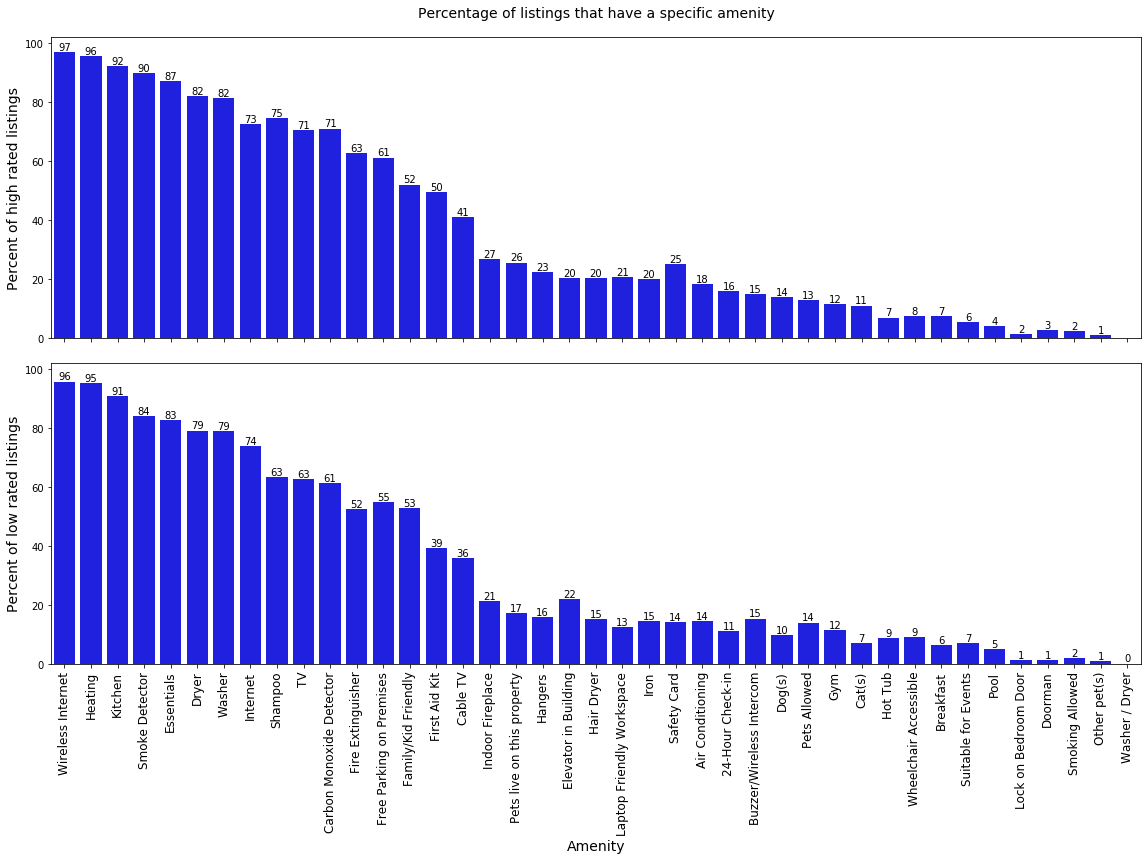

In [113]:
# plot the most common amenities among high and low rated listings
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (16, 12), sharex = True, sharey = True)
sns.barplot(data = amenities_all_tf.sort_values('pct_listings', ascending = False), x = 'amenity', y = 'pct_hr', ax=ax[0], color = 'b')
ax[0].set_title("Percentage of listings that have a specific amenity", fontsize=14, color="black", loc='center', pad=20)
sns.barplot(data = amenities_all_tf.sort_values('pct_listings', ascending = False), x = 'amenity', y = 'pct_lr', ax=ax[1], color = 'b')
plt.xticks(rotation=90, fontsize = 12);
# Adding labels
for axis in ax:
    for bar in axis.patches:
        # Using bar.get_height() + 0.5 to place the label just above the bar
        axis.annotate(f'{bar.get_height():.0f}', 
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points')
# Displaying the plot
plt.tight_layout()

ax[0].set_ylabel("Percent of high rated listings", fontsize = 14);
ax[1].set_xlabel("Amenity", fontsize = 14);
ax[1].set_ylabel("Percent of low rated listings", fontsize = 14);
ax[0].set_xlabel('') 
plt.show()

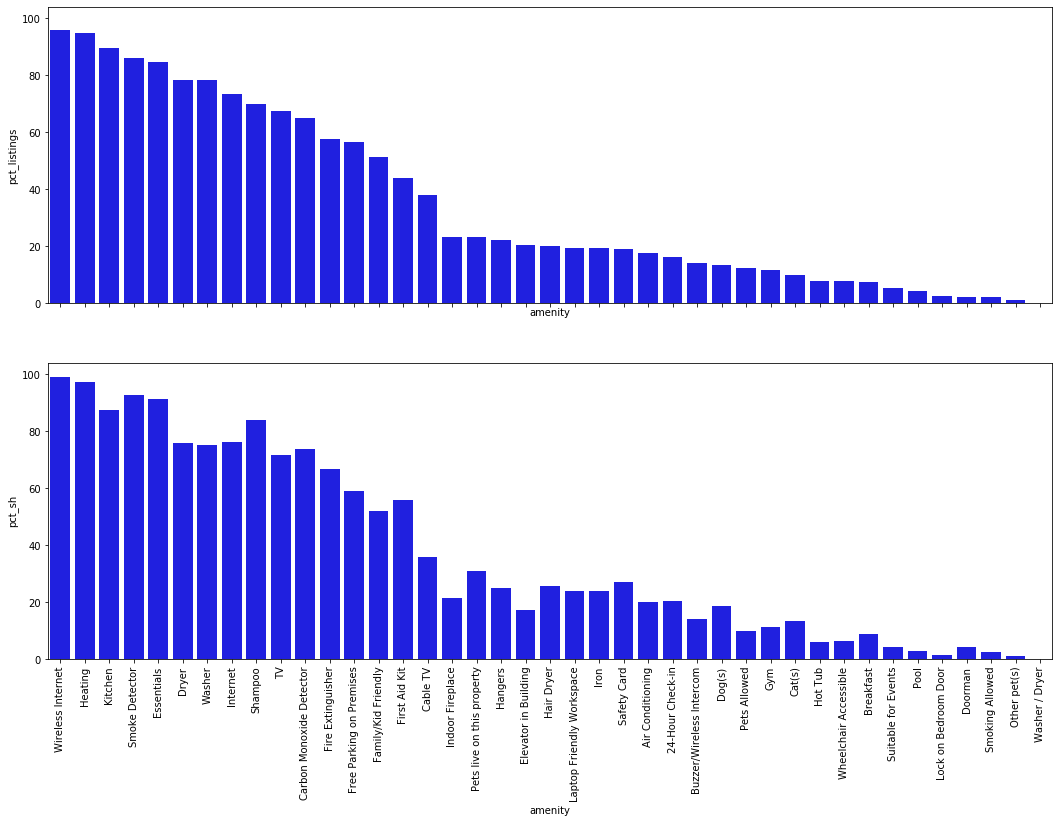

In [114]:
# plot the most common amenities among all listings and superhost listings
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (18, 12), sharex = True, sharey = True)
sns.barplot(data = amenities_all_tf.sort_values('pct_listings', ascending = False), x = 'amenity', y = 'pct_listings', ax=ax[0], color = 'b')
sns.barplot(data = amenities_all_tf.sort_values('pct_listings', ascending = False), x = 'amenity', y = 'pct_sh', ax=ax[1], color = 'b')
plt.xticks(rotation=90);
plt.show()

In [115]:
amenities_all_tf = amenities_all_tf.sort_values('pct_listings', ascending = False)

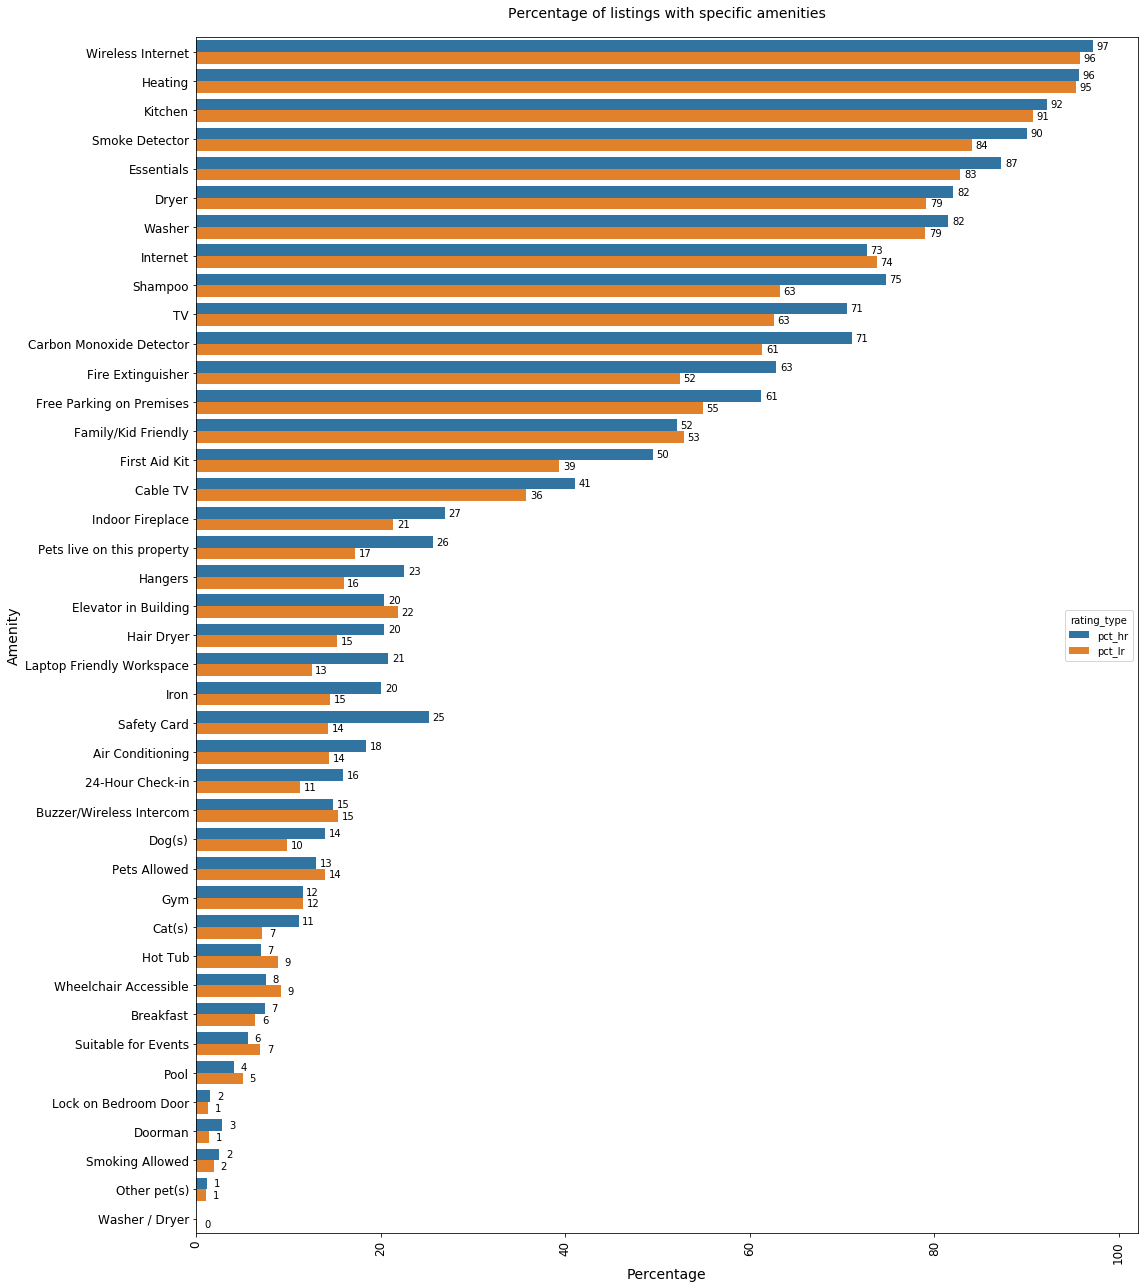

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_melted = amenities_all_tf.melt(id_vars='amenity', value_vars=['pct_hr', 'pct_lr'],
                                  var_name='rating_type', value_name='percentage')
fig, ax = plt.subplots(figsize=(16, 18))

# Using hue for the stacked bar chart
sns.barplot(data=df_melted, x='percentage', y='amenity', hue='rating_type', ax=ax, orient='h')
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{width:.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                xytext=(10, 0),  # Offset of 10 points to the right
                textcoords='offset points')
# Set titles and labels
ax.set_title("Percentage of listings with specific amenities", fontsize=14, color="black", loc='center', pad=20)
ax.set_xlabel("Percentage", fontsize=14)
ax.set_ylabel("Amenity", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks( fontsize=12)
# Displaying the plot
plt.tight_layout()
plt.show()
